<a href="https://colab.research.google.com/github/odu-cs625-datavis/fall23-mcw-maazhasnainkhan/blob/main/fall23-mcw-maazhasnainkhan%20/HW4/CS_625_HW4_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 625 HW3**

## **DATASET 3**

### Q1: Using Table 102, compare life expectancy for people born between 1970-1999 for the four categories, "Male", "Female", "White", "Black".

Mounted at /content/drive


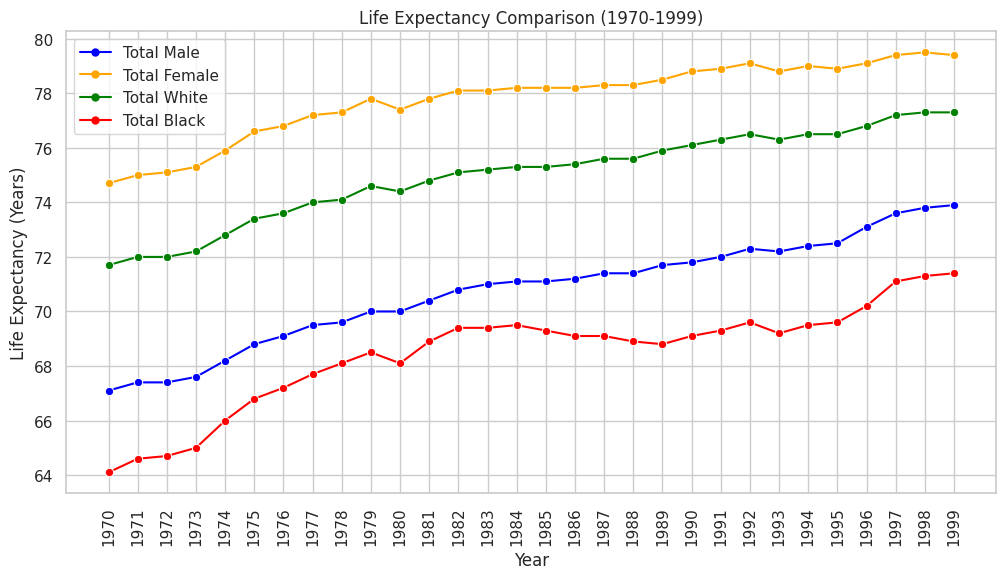

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from matplotlib.lines import Line2D

drive.mount("/content/drive", force_remount=True)
life_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset3_q1.csv")

grouped_data = life_data.groupby('Year').mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

categories = ['Total Male', 'Total Female', 'Total White', 'Total Black']
colors = ['blue', 'orange', 'green', 'red']

legend_elements = []

for category, color in zip(categories, colors):
    line = sns.lineplot(data=grouped_data, x='Year', y=category, label=category, color=color, marker='o')

    legend_elements.append(Line2D([0], [0], color=color, label=category, marker='o', markersize=5))

plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy Comparison (1970-1999)")

plt.legend(handles=legend_elements)

plt.xticks(grouped_data['Year'], rotation=90)

plt.show()

### Q2: Using Table 107, compare infant mortality rates (under 1 year) for these same categories between 1980-1999.

Mounted at /content/drive


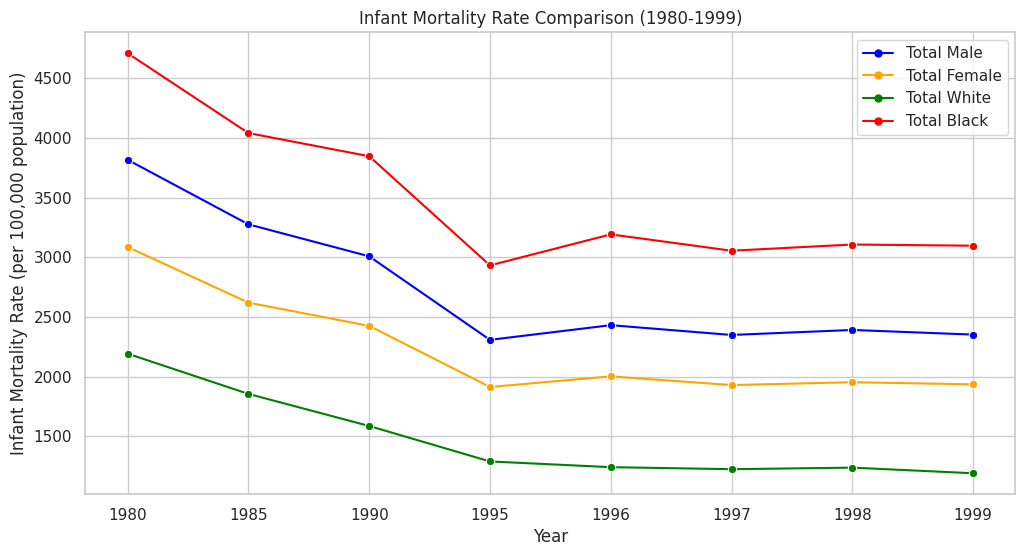

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

deaths_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset3_q2.csv")

deaths_data['Year'] = deaths_data['Year'].astype(int).astype(str)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

categories = ['Total Male', 'Total Female', 'Total White', 'Total Black']
colors = ['blue', 'orange', 'green', 'red']

legend_elements = []

for category, color in zip(categories, colors):
    sns.lineplot(data=deaths_data, x='Year', y=category, label=category, color=color, marker='o')

    legend_elements.append(plt.Line2D([0], [0], color=color, label=category, marker='o', markersize=5))

plt.xlabel("Year")
plt.ylabel("Infant Mortality Rate (per 100,000 population)")
plt.title("Infant Mortality Rate Comparison (1980-1999)")

plt.legend(handles=legend_elements)

plt.show()


# **THE CHARTS AFTER THIS ARE NOT MEANT FOR GRADING**

# **PRACTICE**

### Extra Credit [2 points]: Combine the data from Tables 102 and 107 to investigate how infant mortality might affect overall life expectancy.

Mounted at /content/drive


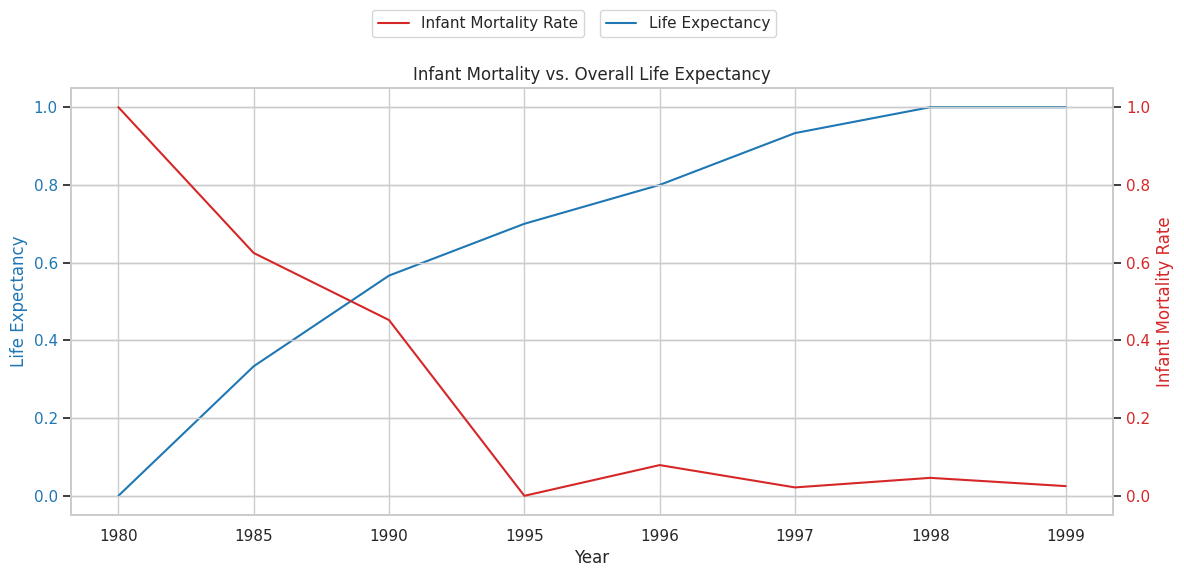

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

life_expectancy_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset3_q1.csv")
mortality_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset3_q2.csv")

merged_data = pd.merge(life_expectancy_data, mortality_data, on='Year')
merged_data['Year'] = merged_data['Year'].astype(int).astype(str)

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

def scale_data(data):
    min_data = min(data)
    max_data = max(data)
    return [(x - min_data) / (max_data - min_data) for x in data]

scaled_life_expectancy = scale_data(merged_data['Total_x'])
scaled_mortality_rate = scale_data(merged_data['Total_y'])

ax1.set_xlabel('Year')
ax1.set_ylabel('Life Expectancy', color='tab:blue')
ax1.plot(merged_data['Year'], scaled_life_expectancy, color='tab:blue', label='Life Expectancy')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 1.20), ncol=4)

ax2 = ax1.twinx()

ax2.set_ylabel('Infant Mortality Rate', color='tab:red')
ax2.plot(merged_data['Year'], scaled_mortality_rate, color='tab:red', label='Infant Mortality Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 1.20), ncol=4)

plt.title("Infant Mortality vs. Overall Life Expectancy")

fig.tight_layout()
plt.show()

## **DATASET 1**

### Q1: Compare the ages of women at the time of the birth of their first child between 1990-2008. For instance, is there any evidence that women in the US are waiting longer to have their first child?

Mounted at /content/drive


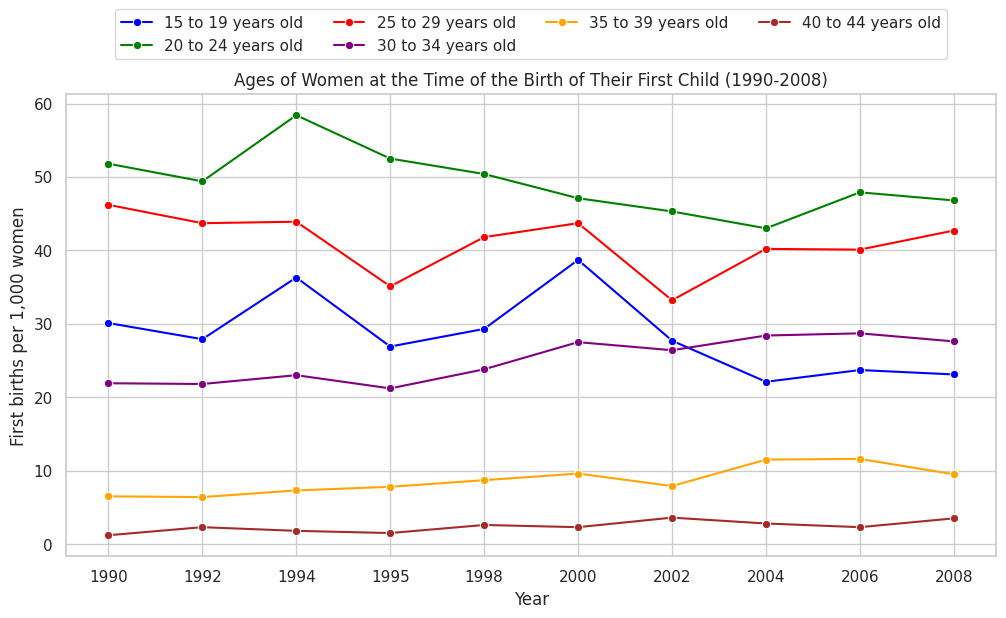

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

first_birth_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset1_q1.csv")

first_birth_data.set_index('year', inplace=True)

first_birth_data = first_birth_data.T

line_styles = ['-', '-', '-', '-', '-', '-', '-', '-']
line_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

legend_labels = first_birth_data.index

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for i, (label, color, style) in enumerate(zip(legend_labels, line_colors, line_styles)):
    x_values = first_birth_data.columns.astype(int).astype(str)  # Convert years to strings
    sns.lineplot(x=x_values, y=first_birth_data.loc[label], label=label, color=color, linestyle=style, marker='o')  # Add 'marker' argument

plt.xlabel("Year")
plt.ylabel("First births per 1,000 women")
plt.title("Ages of Women at the Time of the Birth of Their First Child (1990-2008)")

legend_elements = [
    Line2D([0], [0], color=color, linestyle=style, label=label)
    for label, color, style in zip(legend_labels, line_colors, line_styles)
]

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=4)

plt.xticks(x_values)

plt.show()


Mounted at /content/drive


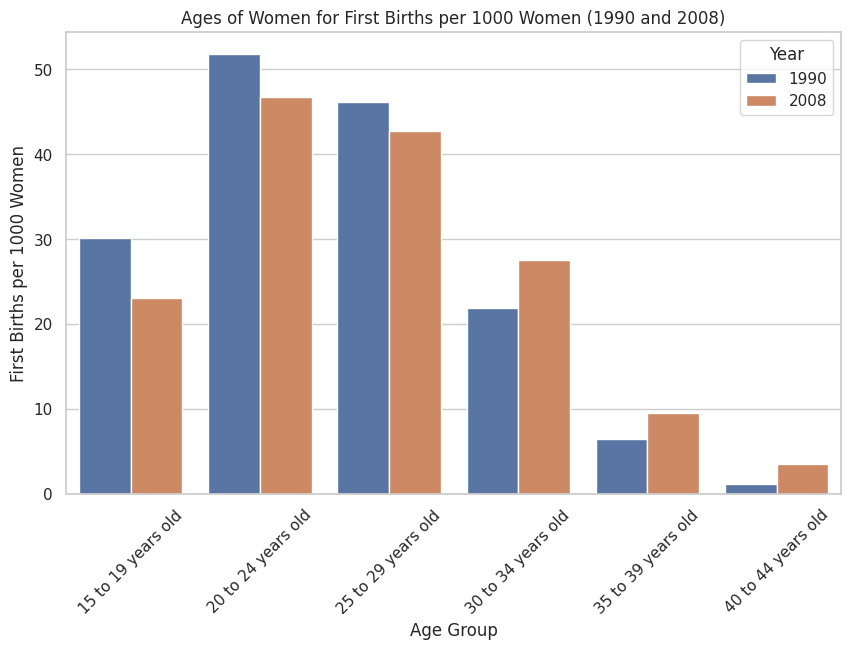

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

first_birth_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset1_q1.csv")

first_birth_data_filtered = first_birth_data[['year', '15 to 19 years old', '20 to 24 years old', '25 to 29 years old', '30 to 34 years old', '35 to 39 years old', '40 to 44 years old']]

grouped_data = first_birth_data_filtered[(first_birth_data_filtered['year'] == 1990) | (first_birth_data_filtered['year'] == 2008)]

melted_data = pd.melt(grouped_data, id_vars=['year'], var_name='Age Group', value_name='First Births per 1000 Women')

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x="Age Group", y="First Births per 1000 Women", hue="year", data=melted_data)
plt.title("Ages of Women for First Births per 1000 Women (1990 and 2008)")
plt.xlabel("Age Group")
plt.ylabel("First Births per 1000 Women")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.show()

### Q2: How does this compare to the number of women in each age group who had a child (not necessarily their first) in that year? What does this say about the age of women giving birth in the US?

Mounted at /content/drive


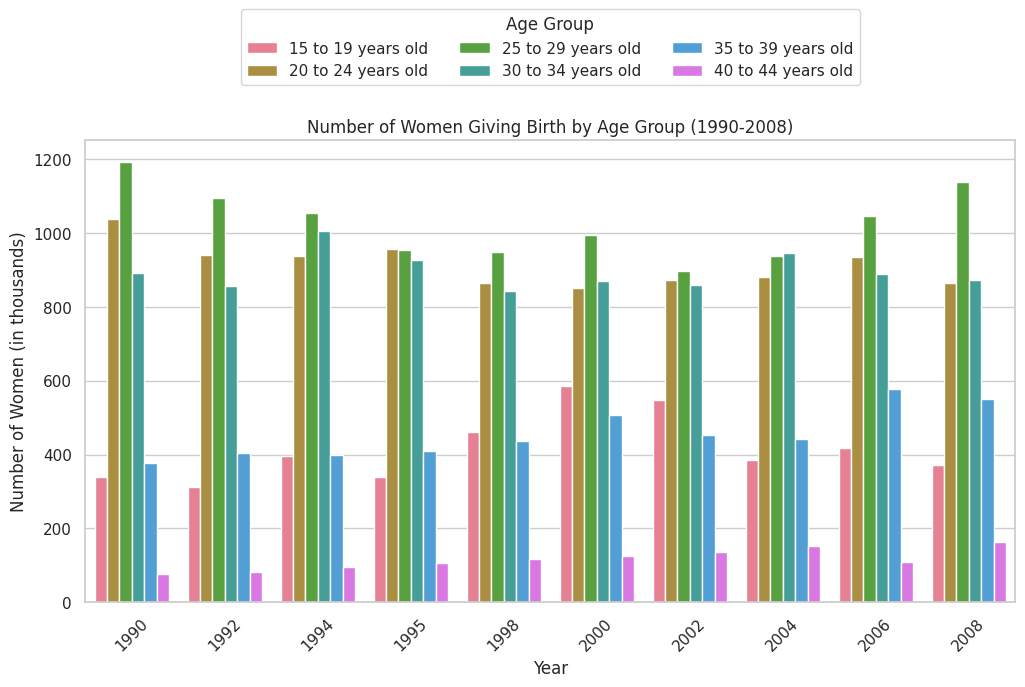

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

number_of_women_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset1_q2_.csv")

sns.set(style="whitegrid")

df_melted = number_of_women_data.melt(id_vars="year", var_name="Age Group", value_name="Number of Women (in thousands)")

plt.figure(figsize=(12, 6))
sns.barplot(x="year", y="Number of Women (in thousands)", hue="Age Group", data=df_melted, palette="husl")

plt.title("Number of Women Giving Birth by Age Group (1990-2008)")
plt.xlabel("Year")
plt.ylabel("Number of Women (in thousands)")
plt.legend(title="Age Group", loc="upper center", bbox_to_anchor=(0.5, 1.30), ncol=3)  # Move the legend to top center
plt.xticks(rotation=45)
plt.show()

### Further Questions: What further questions does this prompt? What hypotheses do you have about what the answers might be? Are there other tables that might help you address these questions?
#### What are the contributions of different age groups to the total number of births in a specific year? This can show which age groups are responsible for the majority of births.

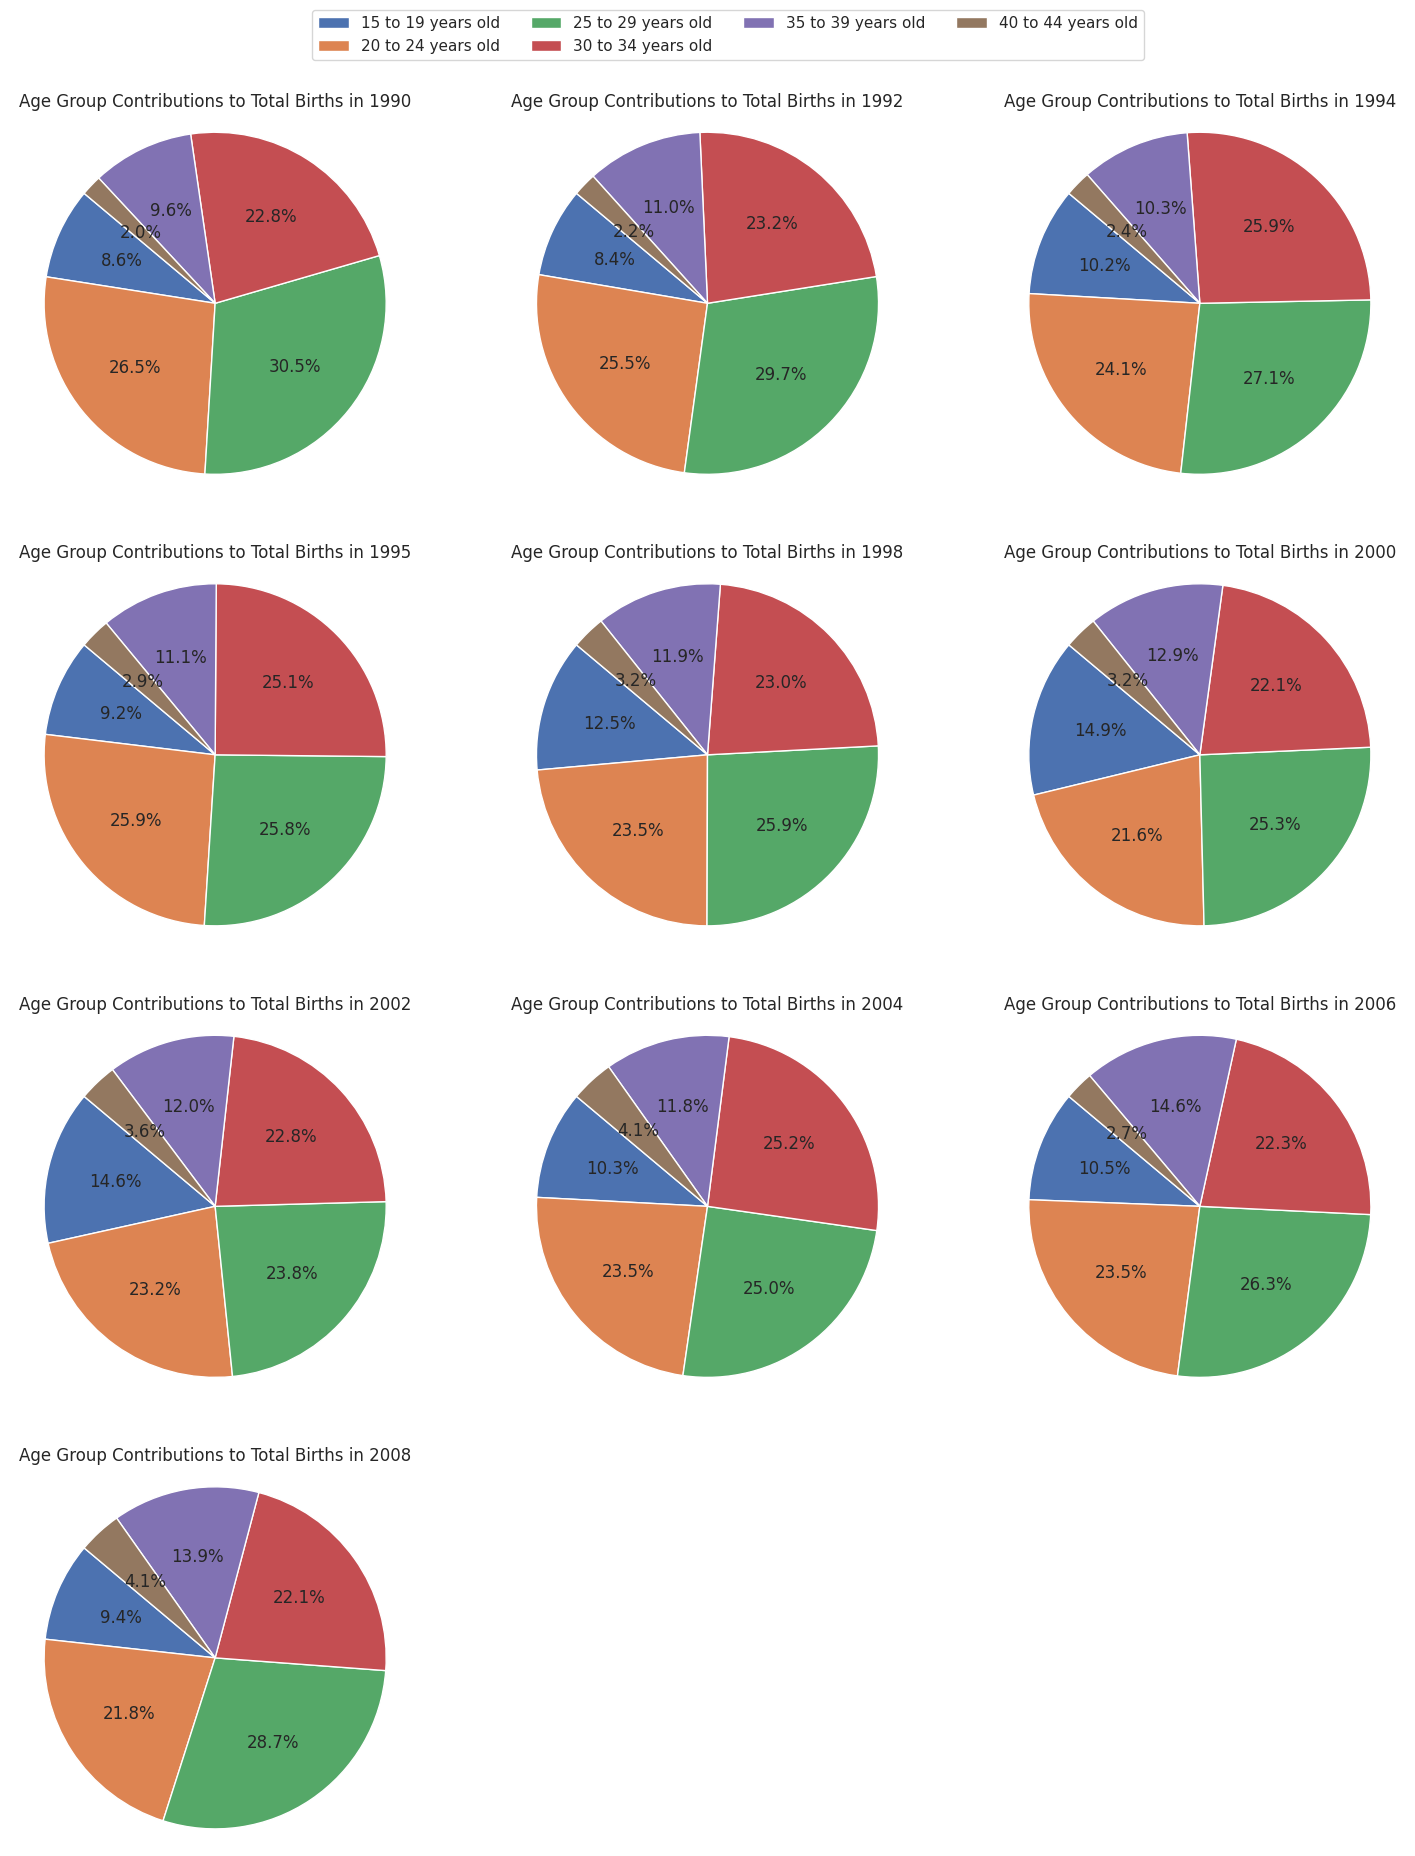

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

number_of_women_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset1_q2_.csv")

years = number_of_women_data['year'].unique()

age_groups = ['15 to 19 years old', '20 to 24 years old', '25 to 29 years old', '30 to 34 years old', '35 to 39 years old', '40 to 44 years old']

num_rows = len(years)
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))

for i, year in enumerate(years):
    data_for_year = number_of_women_data[number_of_women_data['year'] == year]

    num_women = [data_for_year[group].values[0] for group in age_groups]

    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    ax.pie(num_women, labels=[''] * len(age_groups), autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Age Group Contributions to Total Births in {year}')
    ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

for i in range(len(years), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

sns.set(style='whitegrid')

plt.legend(age_groups, loc='upper center', bbox_to_anchor=(1.75, 4.90), ncol=4)
fig.subplots_adjust(top=0.85)

plt.show()


### Extra Credit [2 points]: Combine the data from Tables 91 and 92 (Women Who Have Had a Child in the Last Year By Selected Characteristics) to investigate other factors that affect this.

Mounted at /content/drive


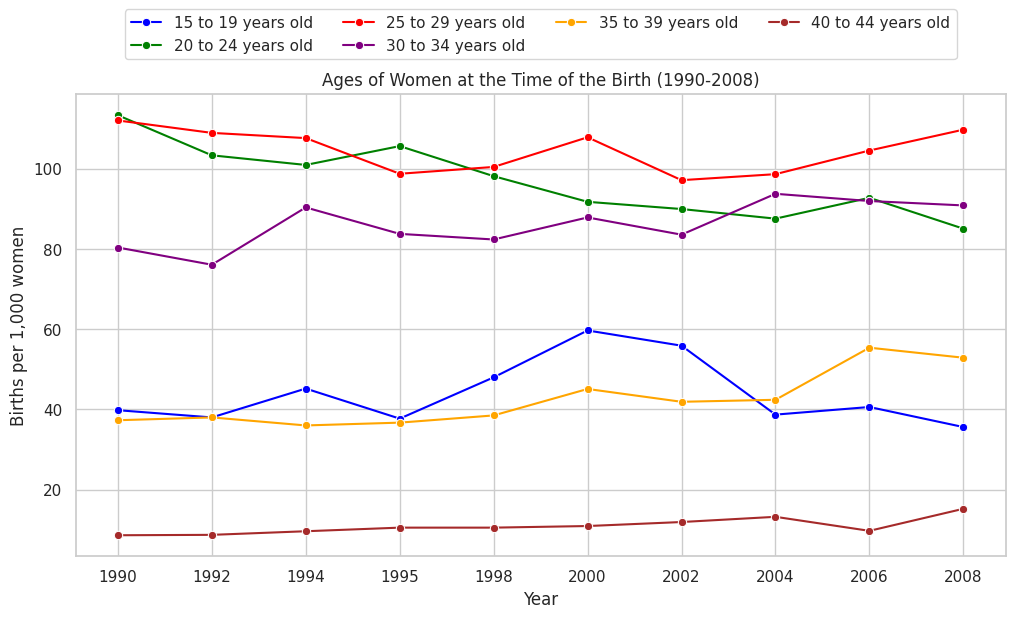

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

first_birth_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset1_q2.csv")

first_birth_data.set_index('year', inplace=True)

first_birth_data = first_birth_data.T

line_styles = ['-', '-', '-', '-', '-', '-', '-', '-']
line_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

legend_labels = first_birth_data.index

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for i, (label, color, style) in enumerate(zip(legend_labels, line_colors, line_styles)):
    x_values = first_birth_data.columns.astype(int).astype(str)  # Convert years to strings
    sns.lineplot(x=x_values, y=first_birth_data.loc[label], label=label, color=color, linestyle=style, marker='o')  # Add 'marker' argument

plt.xlabel("Year")
plt.ylabel("Births per 1,000 women")
plt.title("Ages of Women at the Time of the Birth (1990-2008)")

legend_elements = [
    Line2D([0], [0], color=color, linestyle=style, label=label)
    for label, color, style in zip(legend_labels, line_colors, line_styles)
]

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=4)

plt.xticks(x_values)

plt.show()


## **DATASET 2**

### Q1: Which states had the highest death rates over all causes in 2006?



Mounted at /content/drive


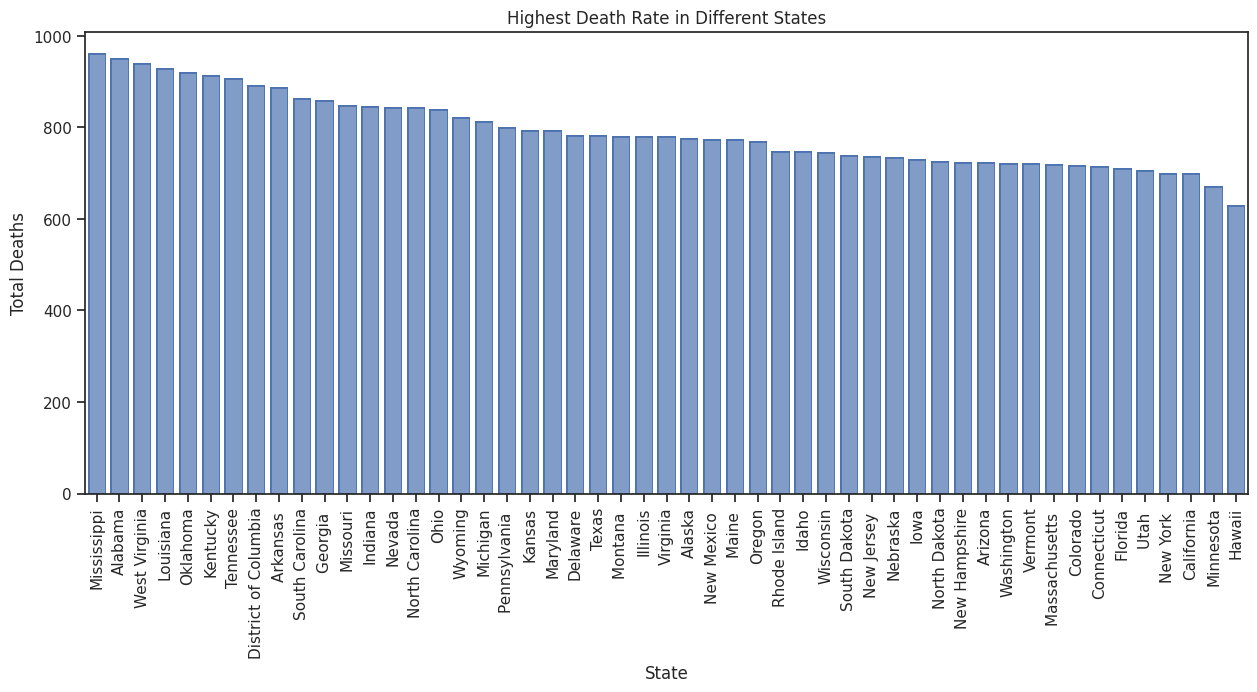

In [9]:
import seaborn as sns
import seaborn.objects as so
from seaborn import axes_style
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

deaths_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset2.csv")

deaths_data = deaths_data.sort_values(by='Total Deaths', ascending=False)
fig = plt.figure(figsize=(15, 6))
(
    so.Plot(data=deaths_data, x='State', y='Total Deaths').layout(size=(20, 6))
    .add(so.Bar())
    .on(fig)
    .label(title="Highest Death Rate in Different States")
    .theme({**axes_style("ticks")})
    .add(so.Text(halign="left"))
    .plot()
)
for ax in fig.axes:
    ax.tick_params("x", rotation=90)

### Q2: Is this ordering different if you compare deaths due to disease vs. deaths due to accident, injury, and assault? In other words, which states are more hazardous to your health vs. which states are the most dangerous?

Mounted at /content/drive


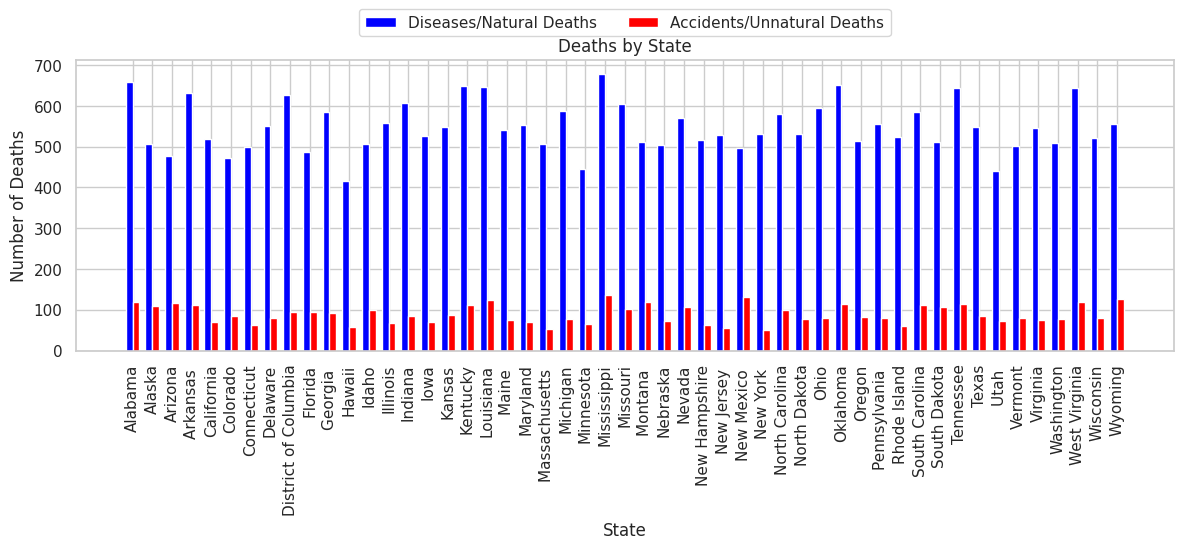

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
deaths_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset2.csv")

natural_death_columns = ['Diseases of heart', 'Malignant neoplasms (cancer)', 'Cerebrovascular diseases',
                         'Chronic lower respiratory disease', 'Diabetes mellitus', "Alzheimer's disease",
                         'Influenza and pneumonia', 'Nephritis, nephrotic syndrome and nephrosis', 'Human immunodeficiency virus (HIV)']
unnatural_death_columns = ['Total Accidents', 'Motor vehicle accidents', 'By firearms',
                           'Intentional self-harm (suicide)', 'Assault (homicide)']

valid_natural_death_columns = deaths_data[natural_death_columns].select_dtypes(include=['number'])
deaths_data['Deaths due to diseases/natural deaths'] = valid_natural_death_columns.sum(axis=1)

valid_unnatural_death_columns = deaths_data[unnatural_death_columns].select_dtypes(include=['number'])
deaths_data['Deaths due to accidents/unnatural deaths'] = valid_unnatural_death_columns.sum(axis=1)

plt.figure(figsize=(12, 6))

x = range(len(deaths_data['State']))

bar_width = 0.35

plt.bar(x, deaths_data['Deaths due to diseases/natural deaths'], bar_width, label='Diseases/Natural Deaths', color='blue')
plt.bar([i + bar_width for i in x], deaths_data['Deaths due to accidents/unnatural deaths'], bar_width, label='Accidents/Unnatural Deaths', color='red')

plt.title('Deaths by State')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks([i + bar_width/2 for i in x], deaths_data['State'], rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=4)
plt.tight_layout()
plt.show()


Mounted at /content/drive


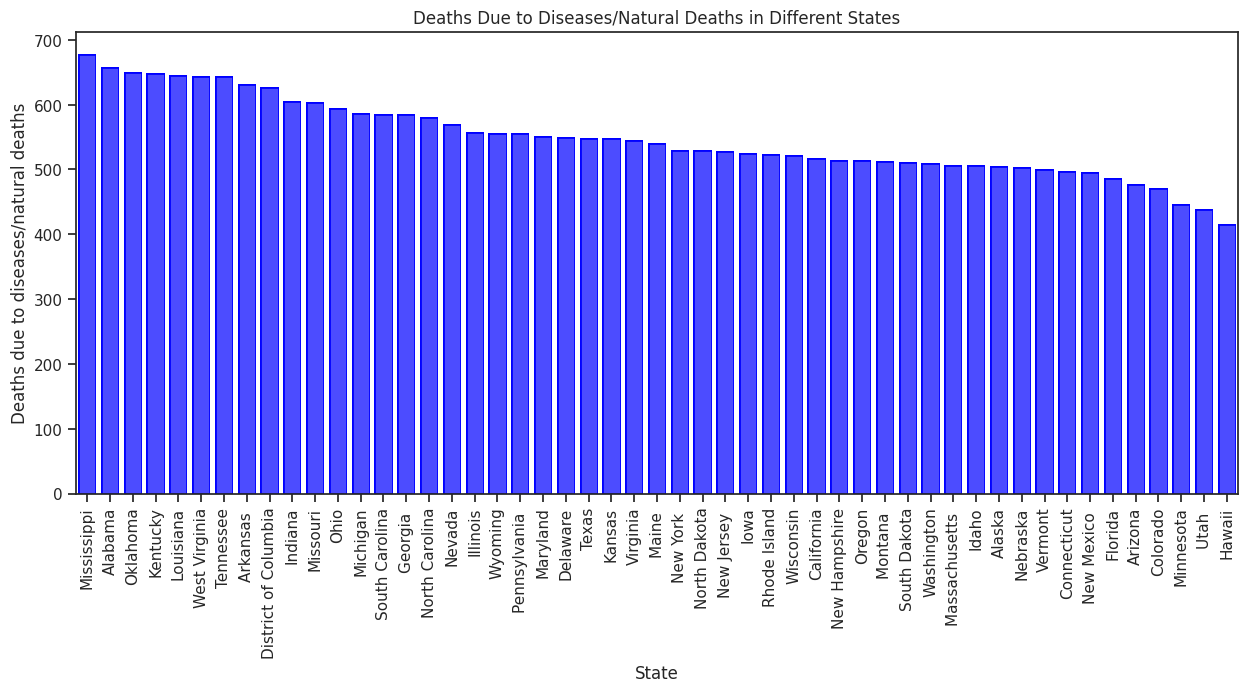

In [11]:
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import axes_style
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
deaths_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset2.csv")

natural_death_columns = ['Diseases of heart', 'Malignant neoplasms (cancer)', 'Cerebrovascular diseases',
                         'Chronic lower respiratory disease', 'Diabetes mellitus', "Alzheimer's disease",
                         'Influenza and pneumonia', 'Nephritis, nephrotic syndrome and nephrosis', 'Human immunodeficiency virus (HIV)']
unnatural_death_columns = ['Total Accidents', 'Motor vehicle accidents', 'By firearms',
                           'Intentional self-harm (suicide)', 'Assault (homicide)']

valid_natural_death_columns = deaths_data[natural_death_columns].select_dtypes(include=['number'])
deaths_data['Deaths due to diseases/natural deaths'] = valid_natural_death_columns.sum(axis=1)

valid_unnatural_death_columns = deaths_data[unnatural_death_columns].select_dtypes(include=['number'])
deaths_data['Deaths due to accidents/unnatural deaths'] = valid_unnatural_death_columns.sum(axis=1)
deaths_data = deaths_data.sort_values(by='Deaths due to diseases/natural deaths', ascending=False)

fig = plt.figure(figsize=(15, 6))

(
    so.Plot(data=deaths_data, x='State', y=deaths_data['Deaths due to diseases/natural deaths'])
    .add(so.Bar(color="blue"))
    .on(fig)
    .label(title="Deaths Due to Diseases/Natural Deaths in Different States")
    .theme({**axes_style("ticks")})
    .add(so.Text(halign="left"))
    .plot()
)
for ax in fig.axes:
    ax.tick_params("x", rotation=90)

Mounted at /content/drive


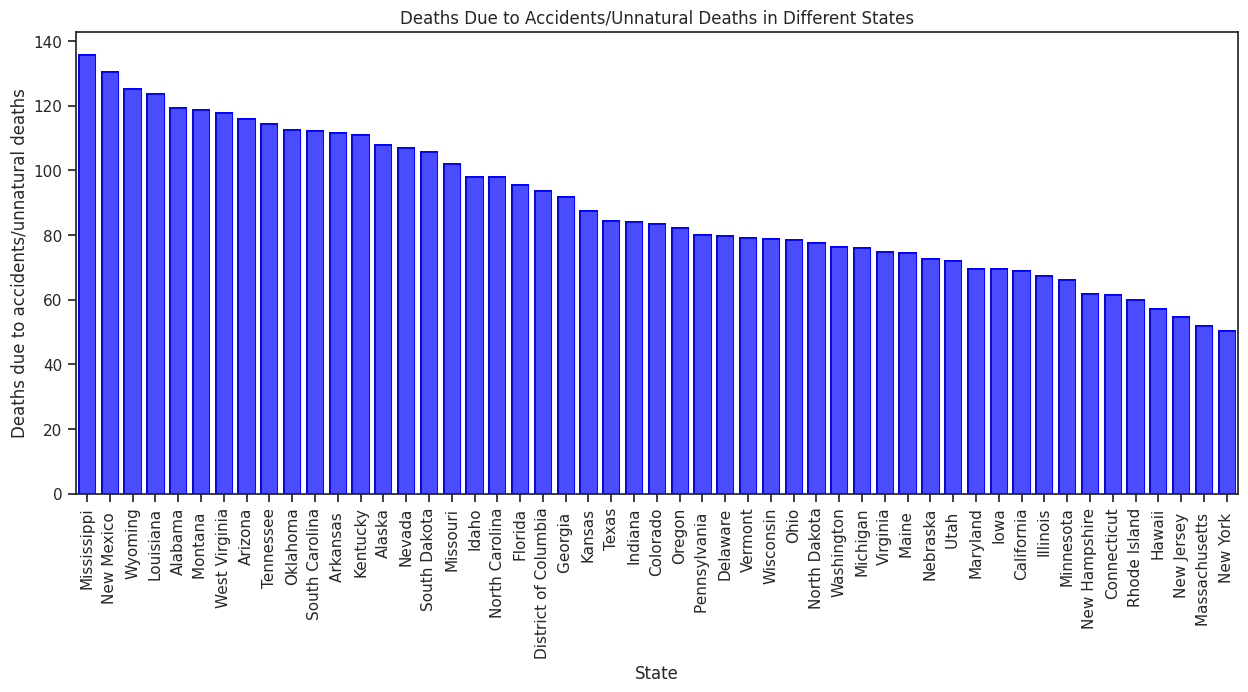

In [12]:
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from seaborn import axes_style
import pandas as pd
from google.colab import drive
from matplotlib.lines import Line2D

drive.mount("/content/drive", force_remount=True)
deaths_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset2.csv")

natural_death_columns = ['Diseases of heart', 'Malignant neoplasms (cancer)', 'Cerebrovascular diseases',
                         'Chronic lower respiratory disease', 'Diabetes mellitus', "Alzheimer's disease",
                         'Influenza and pneumonia', 'Nephritis, nephrotic syndrome and nephrosis', 'Human immunodeficiency virus (HIV)']
unnatural_death_columns = ['Total Accidents', 'Motor vehicle accidents', 'By firearms',
                           'Intentional self-harm (suicide)', 'Assault (homicide)']

valid_natural_death_columns = deaths_data[natural_death_columns].select_dtypes(include=['number'])
deaths_data['Deaths due to diseases/natural deaths'] = valid_natural_death_columns.sum(axis=1)

valid_unnatural_death_columns = deaths_data[unnatural_death_columns].select_dtypes(include=['number'])
deaths_data['Deaths due to accidents/unnatural deaths'] = valid_unnatural_death_columns.sum(axis=1)
deaths_data = deaths_data.sort_values(by='Deaths due to accidents/unnatural deaths', ascending=False)
fig = plt.figure(figsize=(15, 6))

(
    so.Plot(data=deaths_data, x='State', y=deaths_data['Deaths due to accidents/unnatural deaths'])
    .add(so.Bar(color="blue"))
    .on(fig)
    .label(title="Deaths Due to Accidents/Unnatural Deaths in Different States")
    .theme({**axes_style("ticks")})
    .add(so.Text(halign="left"))
    .plot()
)
for ax in fig.axes:
    ax.tick_params("x", rotation=90)

### Further Questions: What further questions does this prompt? What hypotheses do you have about what the answers might be? Are there other tables that might help you address these questions?

#### Which disease has the highest death rate? What is the most common unnatural death cause? What is the leading cause of death in different States?

Mounted at /content/drive


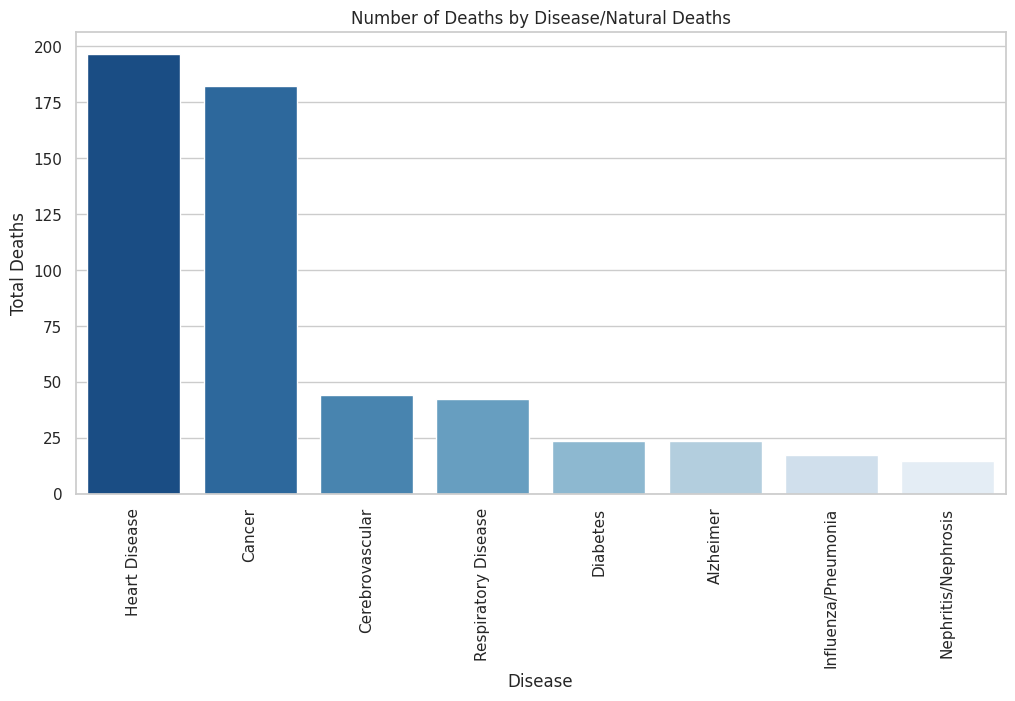

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

deaths_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset2.csv")

diseases_mapping = {
    'Diseases of heart': 'Heart Disease',
    'Malignant neoplasms (cancer)': 'Cancer',
    'Cerebrovascular diseases': 'Cerebrovascular',
    'Chronic lower respiratory disease': 'Respiratory Disease',
    'Diabetes mellitus': 'Diabetes',
    "Alzheimer's disease": 'Alzheimer',
    'Influenza and pneumonia': 'Influenza/Pneumonia',
    'Nephritis, nephrotic syndrome and nephrosis': 'Nephritis/Nephrosis'
}

diseases_data = deaths_data[['State'] + list(diseases_mapping.keys())]

diseases_data = diseases_data.rename(columns=diseases_mapping)

diseases_data_long = diseases_data.melt(id_vars='State', var_name='Disease', value_name='Total Deaths')

plt.figure(figsize=(12, 6))
sns.barplot(data=diseases_data_long, x='Disease', y='Total Deaths', palette='Blues_r', errorbar=None)
plt.title('Number of Deaths by Disease/Natural Deaths')
plt.xlabel('Disease')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)
plt.show()


Mounted at /content/drive


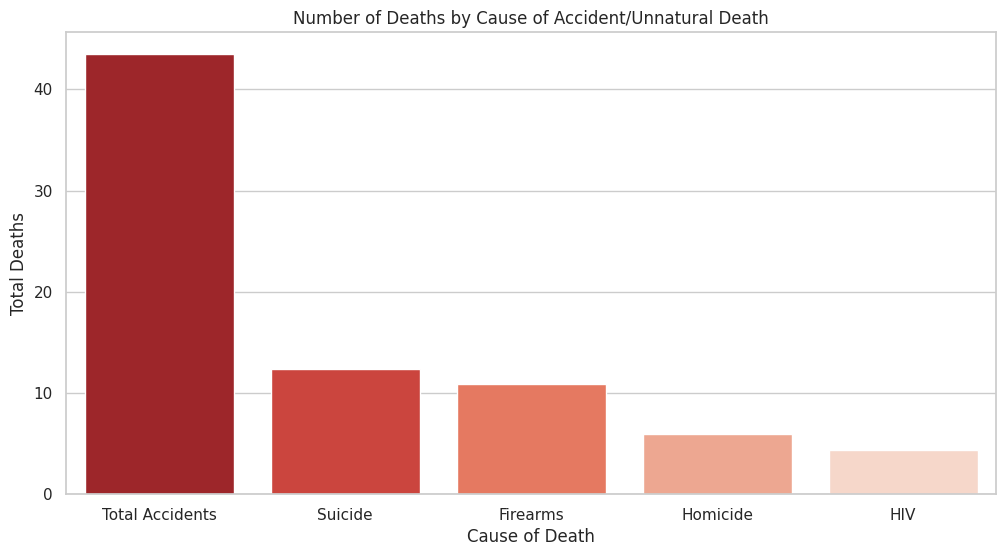

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


drive.mount("/content/drive", force_remount=True)

deaths_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset2.csv")

accidents_mapping = {
    'Total Accidents': 'Total Accidents',
    'Intentional self-harm (suicide)': 'Suicide',
    'By firearms': 'Firearms',
    'Assault (homicide)': 'Homicide',
    'Human immunodeficiency virus (HIV)': 'HIV'
}

accidents_data = deaths_data[['State'] + list(accidents_mapping.keys())]

accidents_data = accidents_data.rename(columns=accidents_mapping)

accidents_data_long = accidents_data.melt(id_vars='State', var_name='Cause of Death', value_name='Total Deaths')

plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_data_long, x='Cause of Death', y='Total Deaths', palette='Reds_r', errorbar=None)
plt.title('Number of Deaths by Cause of Accident/Unnatural Death')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.show()


Mounted at /content/drive


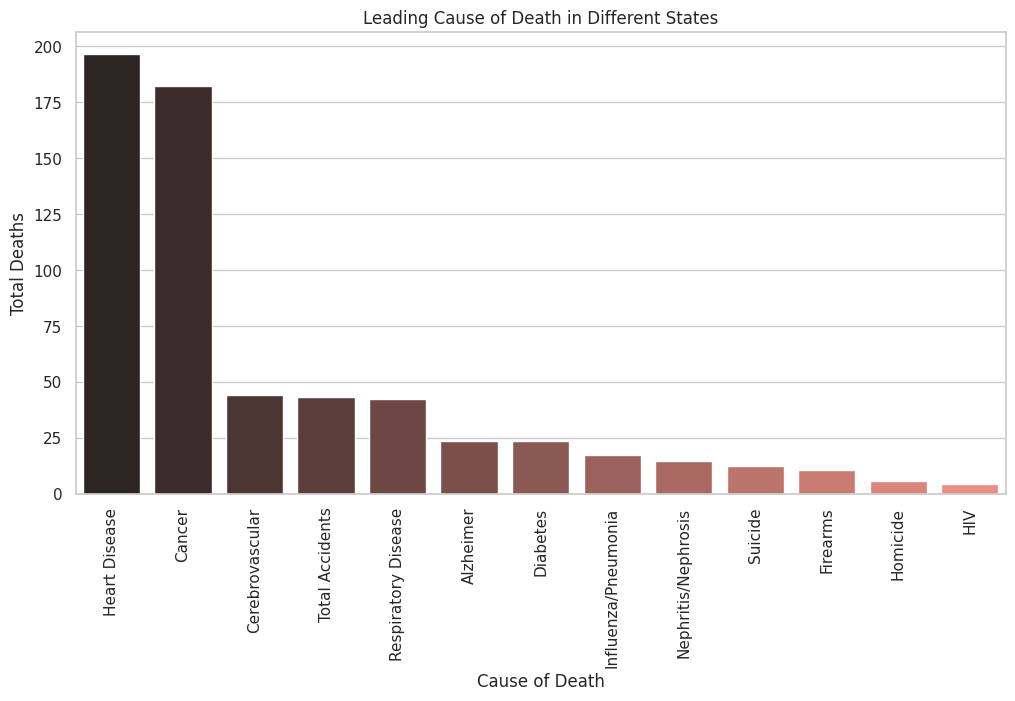

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


drive.mount("/content/drive", force_remount=True)

deaths_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset2.csv")

leading_deaths_mapping = {
    'Diseases of heart': 'Heart Disease',
    'Malignant neoplasms (cancer)': 'Cancer',
    'Cerebrovascular diseases': 'Cerebrovascular',
    'Total Accidents': 'Total Accidents',
    'Chronic lower respiratory disease': 'Respiratory Disease',
    "Alzheimer's disease": 'Alzheimer',
    'Diabetes mellitus': 'Diabetes',
    'Influenza and pneumonia': 'Influenza/Pneumonia',
    'Nephritis, nephrotic syndrome and nephrosis': 'Nephritis/Nephrosis',
    'Intentional self-harm (suicide)': 'Suicide',
    'By firearms': 'Firearms',
    'Assault (homicide)': 'Homicide',
    'Human immunodeficiency virus (HIV)': 'HIV',
}


leading_deaths_data = deaths_data[['State'] + list(leading_deaths_mapping.keys())]

leading_deaths_data = leading_deaths_data.rename(columns=leading_deaths_mapping)

leading_deaths_data_long = leading_deaths_data.melt(id_vars='State', var_name='Cause of Death', value_name='Total Deaths')

plt.figure(figsize=(12, 6))
sns.barplot(data=leading_deaths_data_long, x='Cause of Death', y='Total Deaths', palette='dark:salmon', errorbar=None)
plt.title('Leading Cause of Death in Different States')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)
plt.show()


### Extra Credit [2 points]: Combine this data with the state population distribution by age (found in Table 16 in Section 1. Population) to investigate other factors that might affect this. (It's ok that the death data is from 2006 and the population data is from 2008 -- it's close enough.)

Mounted at /content/drive


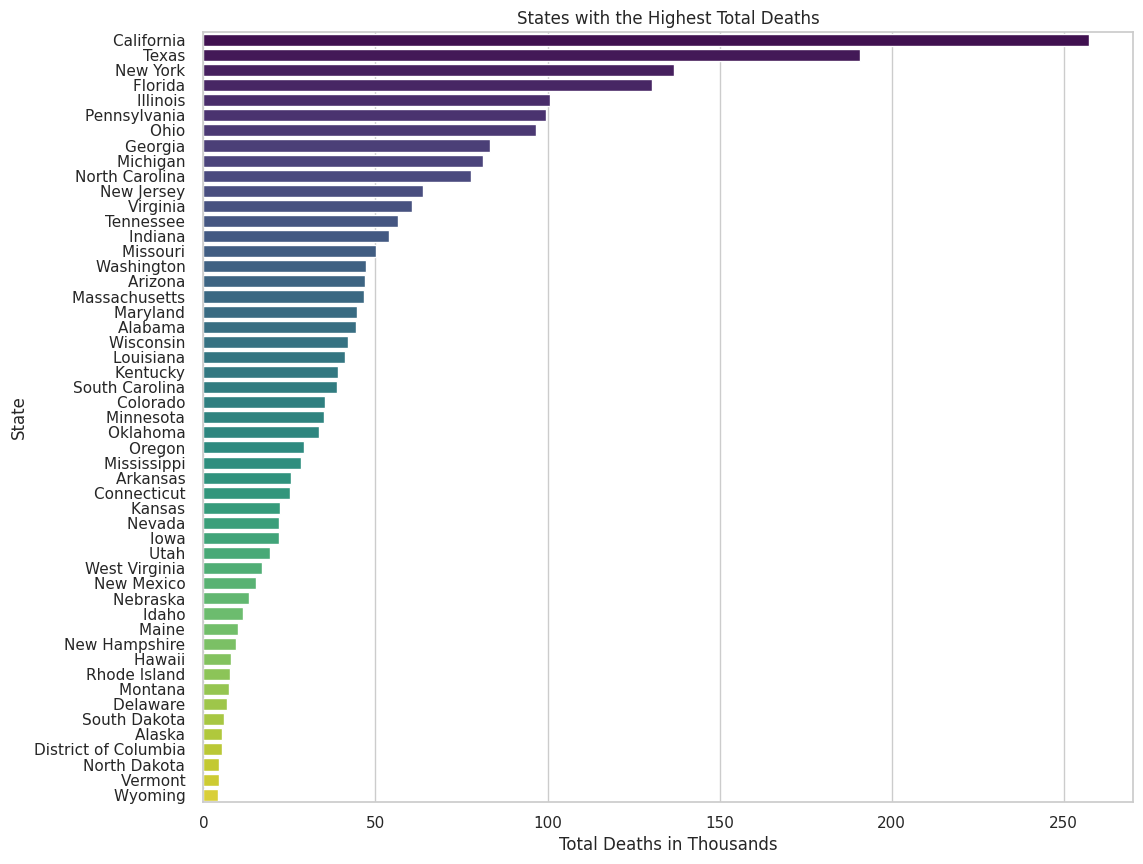

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

deaths_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset2_ec.csv")

deaths_data['Total Deaths'] = (deaths_data['Total Deaths (rates per 100,000 population)'] / 100000) * deaths_data['Total Population in Thousands (4661.9 represents 4661900)']

sorted_data = deaths_data.sort_values(by="Total Deaths", ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x="Total Deaths", y="State", data=sorted_data, palette="viridis")

plt.title("States with the Highest Total Deaths")
plt.xlabel("Total Deaths in Thousands")
plt.ylabel("State")
plt.show()


## **DATASET 3**

### Extra Credit [2 points]: Combine the data from Tables 102 and 107 to investigate how infant mortality might affect overall life expectancy.

Mounted at /content/drive


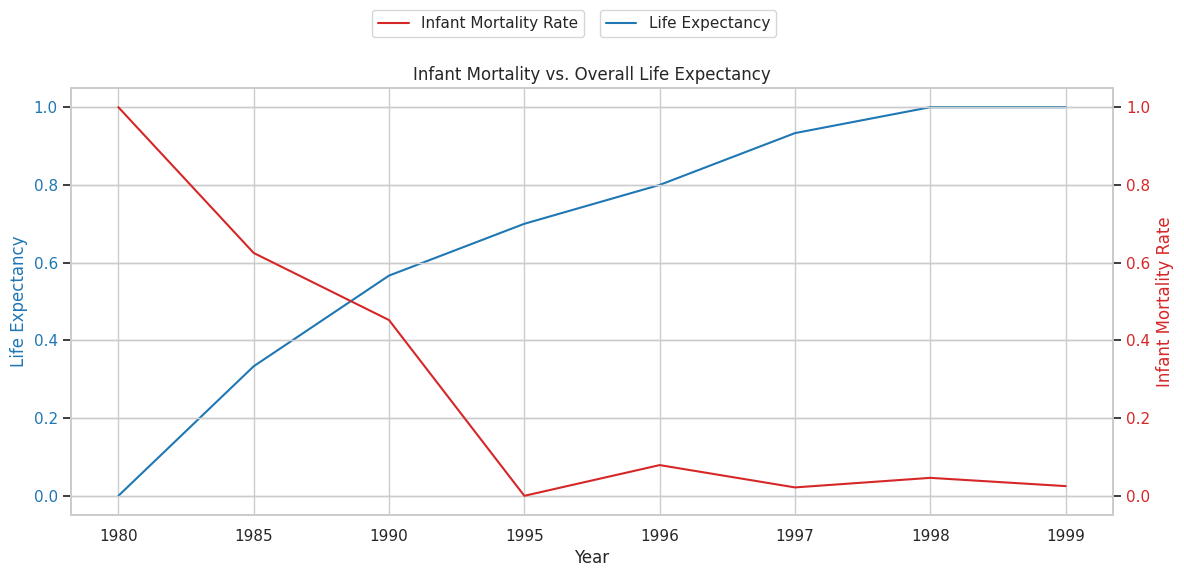

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

life_expectancy_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset3_q1.csv")
mortality_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW4/dataset3_q2.csv")

merged_data = pd.merge(life_expectancy_data, mortality_data, on='Year')
merged_data['Year'] = merged_data['Year'].astype(int).astype(str)

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

def scale_data(data):
    min_data = min(data)
    max_data = max(data)
    return [(x - min_data) / (max_data - min_data) for x in data]

scaled_life_expectancy = scale_data(merged_data['Total_x'])
scaled_mortality_rate = scale_data(merged_data['Total_y'])

ax1.set_xlabel('Year')
ax1.set_ylabel('Life Expectancy', color='tab:blue')
ax1.plot(merged_data['Year'], scaled_life_expectancy, color='tab:blue', label='Life Expectancy')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 1.20), ncol=4)

ax2 = ax1.twinx()

ax2.set_ylabel('Infant Mortality Rate', color='tab:red')
ax2.plot(merged_data['Year'], scaled_mortality_rate, color='tab:red', label='Infant Mortality Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 1.20), ncol=4)

plt.title("Infant Mortality vs. Overall Life Expectancy")

fig.tight_layout()
plt.show()